In [1]:
# The experiments done in notebooks are on Arm Juno r2 board. CPU0-3 are
# little cores with capacity of 383. CPU4-5 are big cores.

In [2]:
import logging
from lisa.utils import setup_logging
setup_logging(level=logging.CRITICAL)

from lisa.target import Target, TargetConf

from lisa.wlgen.rta import RTA, RTAPhase, PeriodicWload, SleepWload

import os
from lisa.trace import FtraceCollector

from lisa.trace import Trace

import holoviews as hv
from lisa.platforms.platinfo import PlatformInfo
from lisa.analysis.tasks import TaskID

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
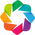

In [3]:
def provide_calibration(calibration):
    target.plat_info["rtapp"].add_src("user", {"calib" : calibration})

def set_cas_mode():
    target.cpufreq.set_all_governors('ondemand')

def create_data_frame(trace, event, task = '', cpu = '-1'):
    df = trace.df_event(event)
    df = df.copy()
    if event.endswith('_se'):
        df = df[(df['comm'] == task)]
    elif event.endswith('_cfs'):
        if event.startswith('sched'):
            df = df[(df['path'] == '/')]
        df = df[(df['cpu'] == cpu)]
    elif event.endswith('cpu_frequency'):
        df = trace.ana.frequency.df_cpu_frequency(cpu)
        df.frequency = df.frequency / 1000
    df = df.reset_index()
    df = df.set_index('Time')

    return df

def grid_style():
    return {'grid_line_color': 'gray', 'grid_line_width': 1.0, 'ygrid_bounds': (0,4000),
            'minor_ygrid_line_color': 'lightgray',
            'minor_xgrid_line_color': 'lightgray', 'xgrid_line_dash': [4, 4]}

def plot_task(trace, task):
    dfs_pelt = create_data_frame(trace, 'sched_pelt_se', task)
    dfs_uclamp = create_data_frame(trace, 'uclamp_util_se', task)
    dfs_freq = create_data_frame(trace, 'cpu_frequency', task)

    plt = hv.Curve(dfs_pelt,  'Time', 'util').relabel('util_avg').opts(interpolation='steps-post') * \
          hv.Curve(dfs_uclamp,  'Time', 'uclamp_avg').relabel('util_avg_uclamp').opts(interpolation='steps-post') 

    curve_opts = hv.opts.Curve(width=1000, height=200, xlabel='time [s]', ylabel='{}_avg'.format('util'), tools=['hover'],
                               title='{}: {}'.format(task, 'util and util_uclamp'),
                               show_grid=True, gridstyle=grid_style())
    return plt.opts(curve_opts)

def plot_task_overutilized(trace, comm):
    task = TaskID(pid=None, comm=comm)
    ana = trace.ana(tasks=[task])
    util_fig = ana.load_tracking.plot_task_signals(task, signals=['util'])
    return util_fig

def plot_root_cfs_rq_and_rq(trace, cpu):
    dfs_pelt = create_data_frame(trace, 'sched_pelt_cfs', cpu=cpu)
    dfs_uclamp = create_data_frame(trace, 'uclamp_util_cfs', cpu=cpu)
    dfs_freq = create_data_frame(trace, 'cpu_frequency', cpu=cpu)

    plt = hv.Curve(dfs_pelt, 'Time', 'util').relabel('util_avg').opts(interpolation='steps-post') * \
          hv.Curve(dfs_freq, 'Time', 'frequency').relabel('cpu_frequency').opts(interpolation='steps-post') * \
          hv.Curve(dfs_uclamp, 'Time', 'uclamp_avg').relabel('root_cfs_util_uclamp').opts(interpolation='steps-post')

    curve_opts = hv.opts.Curve(width=1000, height=300, xlabel='time [s]', ylabel='{}_avg'.format('util'), tools=['hover'],
                               title='root cfs_rq[{}]: {}'.format(cpu, 'util and util_uclamp'),
                               show_grid=True, gridstyle=grid_style())
    return plt.opts(curve_opts)

def plot_trace_view(trace, comms):
    tasks = [TaskID(pid=None, comm=x) for x in comms]
    ana = trace.ana(tasks=tasks)    
    activation_fig = ana.tasks.plot_tasks_activation()
    return activation_fig

def plot_tasks_total_residency(trace, tasks):

    df = trace.ana.tasks.df_tasks_runtime()
    contain_values = df[df['comm'].str.contains(tasks)]
    tasks_df = contain_values.reset_index()
    tasks_pid = tasks_df['pid'].tolist()
    
    return trace.ana.tasks.plot_tasks_total_residency(tasks=tasks_pid)

hv.extension('bokeh')

In [4]:
target = Target.from_default_conf()

In [5]:
events = [
    'sched_switch',
    'sched_wakeup',
    'task_rename',
    'lisa__sched_pelt_cfs',
    'lisa__sched_pelt_se',
    'lisa__sched_overutilized',
    'lisa__uclamp_util_se',
    'lisa__uclamp_util_cfs',
    'cpu_frequency'
]
provide_calibration({0: 186, 1: 186, 2: 186, 3: 186, 4: 66, 5: 66})

In [6]:
# This profile tests whether a simple uclamp_max can hint to EAS to place the
# workloads on LITTLEs. The number of instances should match the number of
# LITTLE CPUs in your system, and the uclamp_max value should be small, at
# least much smaller than the LITTLE capacity. If the hint works, you should
# see all instances placed on LITTLE CPUs, and running at a reduced frequency
# even when they are almost 1024-util tasks.
#
# Note that starting from Cortex-A76, these big CPUs are actually more
# efficient than LITTLE (like Cortex-A55) so you can't tell whether the hint is
# working because the task will be placed on big anyway. To make things obvious,
# run all profiles in this notebook on platforms with bigs < A76 and LITTLEs <
# A55.
rtapp_str_0 = """{
        "tasks" : {
                "thread0" : {
                        "instance" : 4,
                        "loop" : 50,
    
                        "run" :   100000,
                        "sleep" : 1,
                        "util_min" : 0,
                        "util_max" : 110
                }
        },
        "global" : {
                "default_policy" : "SCHED_OTHER",    
                "calibration" : 186,
                "logdir" : __LOGDIR__,
                "lock_pages" : true                                                                                                                                                                               
        }                                                                                                                                                                                                         
}"""

In [7]:
wload = RTA.from_str(target, rtapp_str_0)
#wload = RTA.from_profile(target, rtapp_profile_0, name='4TasksWithUclampmax200')

In [8]:
trace_path = os.path.join(wload.res_dir, "trace.dat")
ftrace_coll = FtraceCollector(target, events=events, buffer_size=65536, output_path=trace_path)

In [9]:
with wload, ftrace_coll:
    wload.run()

In [10]:
trace = Trace(trace_path, target.plat_info, events=events)

In [11]:
plot_trace_view(trace, ['thread0-0', 'thread0-1', 'thread0-2', 'thread0-3'])
#plot_trace_view(trace, ['thd_0-0', 'thd_1-1', 'thd_2-2', 'thd_3-3'])

:Overlay
   .Rectangles.Activations_of_945_left_parenthesis_rt_hyphen_minus_app_comma_thread0_hyphen_minus_0_right_parenthesis :Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)
   .Rectangles.Activations_of_946_left_parenthesis_rt_hyphen_minus_app_comma_thread0_hyphen_minus_1_right_parenthesis :Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)
   .Rectangles.Activations_of_947_left_parenthesis_rt_hyphen_minus_app_comma_thread0_hyphen_minus_2_right_parenthesis :Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)
   .Rectangles.Activations_of_948_left_parenthesis_rt_hyphen_minus_app_comma_thread0_hyphen_minus_3_right_parenthesis :Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)

In [12]:
# This test sees if the scheduler can take the uclamp_min hint. If uclamp_min
# works, then these tasks should be placed on bigs. It also tests uclamp_max
# so the tasks should be placed on bigs but running at a capped frequency.
#
# This profile is designed such that uclamp_min is little CPU capacity + 1 and
# uclamp_max little CPU capacity + 2.
rtapp_str_1 = """{
        "tasks" : {
                "thread0" : {
                        "instance" : 2,
                        "loop" : 50,
    
                        "run" :   100000,
                        "sleep" : 1,
                        "util_min" : 383,
                        "util_max" : 384
                }
        },
        "global" : {
                "default_policy" : "SCHED_OTHER",    
                "calibration" : 186,
                "logdir" : __LOGDIR__,
                "lock_pages" : true                                                                                                                                                                               
        }
}"""

In [13]:
wload = RTA.from_str(target, rtapp_str_1)
#wload = RTA.from_profile(target, rtapp_profile_1, name='4TasksWithUclampminBiggerThanLITTLE')

In [14]:
trace_path = os.path.join(wload.res_dir, "trace.dat")
ftrace_coll = FtraceCollector(target, events=events, buffer_size=65536, output_path=trace_path)

In [15]:
with wload, ftrace_coll:
    wload.run()

In [16]:
trace = Trace(trace_path, target.plat_info, events=events)

In [17]:
plot_trace_view(trace, ['thread0-0', 'thread0-1'])
#plot_trace_view(trace, ['thd_0-0', 'thd_1-1', 'thd_2-2'])

:Overlay
   .Rectangles.Activations_of_1262_left_parenthesis_rt_hyphen_minus_app_comma_thread0_hyphen_minus_0_right_parenthesis :Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)
   .Rectangles.Activations_of_1263_left_parenthesis_rt_hyphen_minus_app_comma_thread0_hyphen_minus_1_right_parenthesis :Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)

In [18]:
# Two threads in this test. First they run on two separate CPUs, one
# always-running (util 1024) but with a uclamp_max; the other has a normal duty
# cycle without any uclamp. After a while, force them to run on the CPU.
#
# This aims to test the 'frequency spike' problem. If the problem exists, one
# should see CPU frequency repeatedly switch between the highest and lowest
# OPP, giving a square-wave shape and rendering such uclamp very noisy and not
# usable.
#
# To make the spikes (or square wave) more obvious, tune the values such that
# the always-running task alone runs the CPU at the lowest OPP by giving it
# a low uclamp_max. Leave the real duty-cycle task's uclamp on default, which
# means its uclamp_max is 1024. Under max aggregation, this uncaps the rq
# uclamp_max and will run at the highest OPP when the duty-cycle task joins,
# and returns to lowest OPP when it sleeps. Theoretically, you can have as many
# spikes per second as the timer tick frequency. (Is this even safe? Can you
# damage the CPU this way?)
rtapp_str_2 = """{
        "tasks": {    
                "thread0": {    
                        "instance": 1,    
                        "loop": 1,    
                        "phases": {    
                                "p0": {    
                                        "cpus": [4],    
                                        "loop": 250,    
                                        "run": 4000,    
                                        "sleep": 6000    
                                },    
                                "p1": {    
                                        "cpus": [5],    
                                        "loop": 300,    
                                        "run": 4000,    
                                        "sleep": 6000    
                                }    
                        }    
                },    
                "thread1": {    
                        "instance": 1,    
                        "loop": 1,    
                        "phases": {    
                                "p0": {    
                                        "cpus": [5],    
                                        "loop": 50,    
                                        "run": 50000,    
                                        "util_max": 300
                                },    
                                "p1": {    
                                        "cpus": [5],    
                                        "loop": 200,    
                                        "run": 50000,    
                                        "util_max": 300    
                                }    
                        }    
                }    
        },    
        "global" : {    
                "default_policy" : "SCHED_OTHER",    
                "calibration" : 186,
                "logdir" : __LOGDIR__,
                "lock_pages" : true
        }
}"""

In [19]:
wload = RTA.from_str(target, rtapp_str_2)
#wload = RTA.from_profile(target, rtapp_profile_2, name='FrequencySpikes')

In [20]:
trace_path = os.path.join(wload.res_dir, "trace.dat")
ftrace_coll = FtraceCollector(target, events=events, buffer_size=65536, output_path=trace_path)

In [21]:
with wload, ftrace_coll:
    wload.run()

In [22]:
trace = Trace(trace_path, target.plat_info, events=events)

In [23]:
plot_root_cfs_rq_and_rq(trace, 5)

:Overlay
   .Curve.Util_avg             :Curve   [Time]   (util)
   .Curve.Cpu_frequency        :Curve   [Time]   (frequency)
   .Curve.Root_cfs_util_uclamp :Curve   [Time]   (uclamp_avg)

In [24]:
# This test is to see whether the scheduler understands that a runqueue running
# at util 1024 doesn't necessarily mean the rq is full. The 1024 can be because
# of uclamp and there's still opportunity to enqueue some tasks.
#
# We first run n (n being the number of LITTLEs) always-running tasks, pinned
# to LITTLE CPUs and capped at a small uclamp_max so that there's still
# opportunity to enqueue some other tasks on each LITTLE CPU. We then run n
# such tasks but pinned to other CPUs. After a while, unpin the latter. If the
# scheduler is clever and understands uclamp, it should move the latter n CPUs
# onto the same LITTLEs of the former n CPUs because this saves energy, leaving
# bigs powered off. Also, it should pack 2 tasks per LITTLE CPU to achieve a
# balanced placement.
#
# However, this highly depends on the EM. The test result will only be obvious
# if scheduling 2 such tasks on each LITTLE is energy efficient according to
# the EM.
rtapp_str_3 = """{    
        "tasks": {    
                "thread0": {    
                        "instance": 4,    
                        "loop": 1,    
                        "cpus": [0, 1, 2, 3],
                        "phases": {
                                "p0": {
                                        "cpus": [0, 1, 2, 3],
                                        "loop": 32,
                                        "runtime": 100000,
                                        "sleep": 1
                                }    
                        },    
                        "util_max": 110    
                },    
                "thread1": {    
                        "instance": 4,    
                        "loop": 1,    
                        "cpus": [4, 5],
                        "phases": {
                                "p0": {
                                        "cpus": [4, 5],
                                        "loop": 16,
                                        "runtime": 100000,
                                        "sleep": 1
                                },
                                "p1": {
                                        "cpus": [0, 1, 2, 3, 4, 5],
                                        "loop": 16,
                                        "runtime": 100000,
                                        "sleep": 1
                                }    
                        },    
                        "util_max": 110    
                }    
        },    
        "global" : {    
                "default_policy" : "SCHED_OTHER",    
                "calibration" : 186,
                "logdir" : __LOGDIR__,
                "lock_pages" : true    
        }    
}"""

In [25]:
wload = RTA.from_str(target, rtapp_str_3)
#wload = RTA.from_profile(target, rtapp_profile_3, name='MultipleUclampmaxTasksPerCPU')

In [26]:
trace_path = os.path.join(wload.res_dir, "trace.dat")
ftrace_coll = FtraceCollector(target, events=events, buffer_size=65536, output_path=trace_path)

In [27]:
with wload, ftrace_coll:
    wload.run()

In [28]:
trace = Trace(trace_path, target.plat_info, events=events)

In [29]:
plot_trace_view(trace, ['thread0-0', 'thread0-1', 'thread0-2', 'thread0-3', 'thread1-4', 'thread1-5', 'thread1-6', 'thread1-7'])
#plot_trace_view(trace, ['pin_0-4', 'pin_1-5', 'pin_2-6', 'pin_3-7', 'float_0-0', 'float_1-1', 'float_2-2', 'float_3-3'])

:Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)

In [30]:
# Similar to the previous test. We just launch 2 * n (n being the number of
# LITTLEs) almost-always-running tasks and see if the scheduler understands
# that you can pack 2 tasks on each LITTLE, even if each task has almost 1024
# utilization. The task placement should also be balanced, having 2 on each
# LITTLE.
#
# Also similar to the previous test, it's sensitive to EM. You will only see
# the effect when packing two such tasks on each LITTLE is still more efficient
# than using bigs.
rtapp_str_4 = """{    
        "tasks": {
                "thread0": {    
                        "instance": 8,
                        "loop": 1,
                        "phases": {
                                "p1": {
                                        "loop": 50,
                                        "run": 100000,
                                        "sleep": 1    
                                }    
                        },    
                        "util_max": 110    
                }    
        },    
        "global" : {    
                "default_policy" : "SCHED_OTHER",    
                "calibration" : 186,
                "logdir" : __LOGDIR__,
                "lock_pages" : true    
        }    
}"""

In [31]:
wload = RTA.from_str(target, rtapp_str_4)
#wload = RTA.from_profile(target, rtapp_profile_4, name='8SmallUclampTasks')

In [32]:
trace_path = os.path.join(wload.res_dir, "trace.dat")
ftrace_coll = FtraceCollector(target, events=events, buffer_size=65536, output_path=trace_path)

In [33]:
with wload, ftrace_coll:
    wload.run()

In [34]:
trace = Trace(trace_path, target.plat_info, events=events)

In [35]:
plot_trace_view(trace, ['thread0-0', 'thread0-1', 'thread0-2', 'thread0-3', 'thread0-4', 'thread0-5', 'thread0-6', 'thread0-7'])
#plot_trace_view(trace, ['max_0-0', 'max_1-1', 'max_2-2', 'max_3-3', 'max_4-4', 'max_5-5', 'max_6-6', 'max_7-7'])

:Rectangles   [Time,CPU,x1,y1]   (pid,comm,start,cpu,duration,duty_cycle)

In [36]:
plot_tasks_total_residency(trace, "thread0")
#plot_tasks_total_residency(trace, "max")

:Bars   [cpu,task]   (Runtime (s))